In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset\insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

le = LabelEncoder()
scaler = MinMaxScaler()

cat = ['sex', 'smoker', 'region', 'children']
num = ['bmi', 'charges', 'age']
target = 'charges'

for c in cat:
    df[c] = le.fit_transform(df[c])

df[num] = scaler.fit_transform(df[num])

In [4]:
X = df.drop(columns=[target]).to_numpy()
y = df[target].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [5]:
ref = LinearRegression()
ref.fit(X_train, y_train)
y_ref = ref.predict(X_test)

In [6]:
from linear_regression import LinearRegression as MyLinearRegression
own = MyLinearRegression()
tau = own.fit_tau(X_train, X_test, y_train, y_test)
own.fit(X_train, y_train, tau=tau)
y_pred = own.predict(X_test)
own.fit(X_train, y_train, tau=0)
y_pred_zerotau = own.predict(X_test)

In [7]:
print(f'Reference model | R2 score {r2_score(y_test, y_ref):.4f}')
print(f'Own model with best tau | R2 score {r2_score(y_test, y_pred):.4f}')
print(f'Own model with zero tau | R2 score {r2_score(y_test, y_pred_zerotau):.4f}')
print(f'best tau: {tau}')

Reference model | R2 score 0.7343
Own model with best tau | R2 score 0.7333
Own model with zero tau | R2 score 0.7200
best tau: 23.128


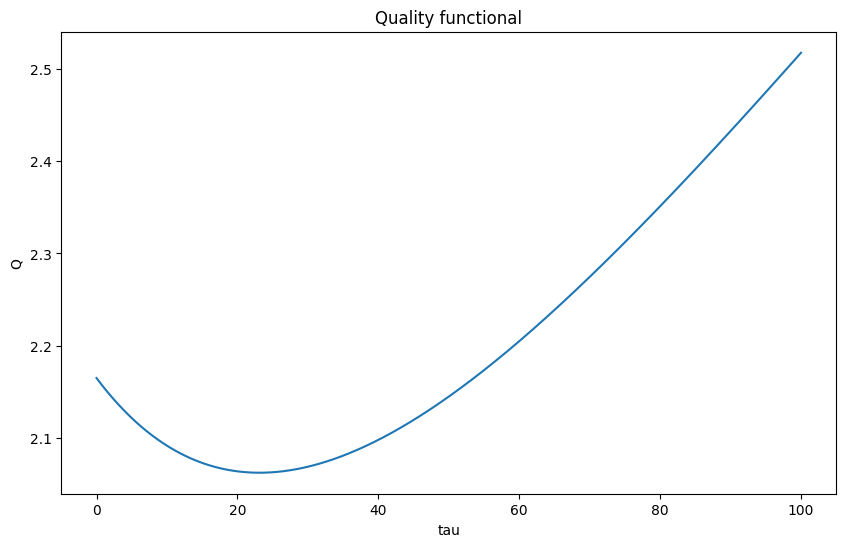

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(own.tau_range, own.Q)
plt.title('Quality functional')
plt.xlabel('tau')
plt.ylabel('Q')
plt.show()

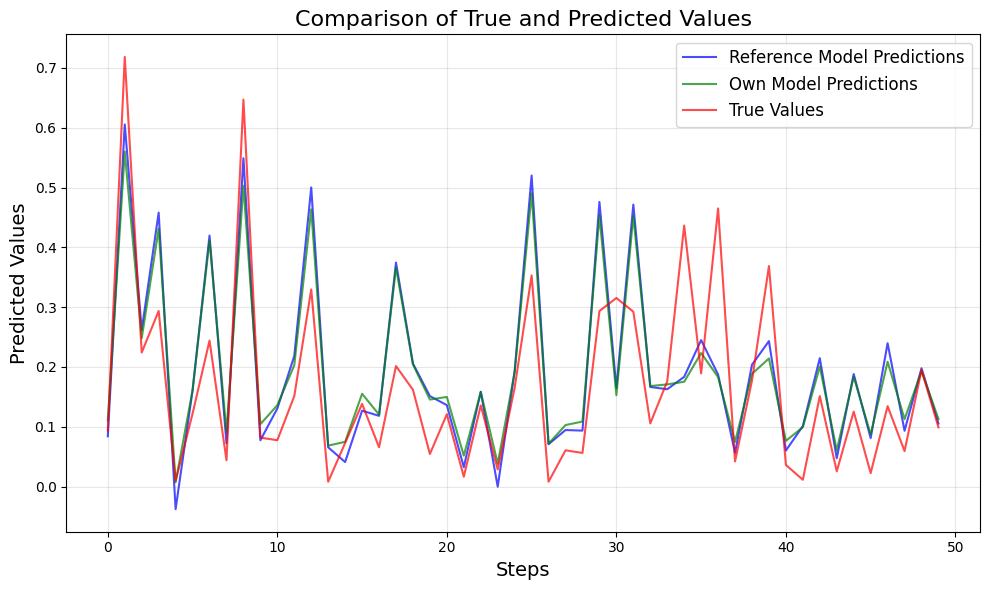

In [9]:
plt.figure(figsize=(10, 6))

plt.plot(y_ref[:50], alpha=0.7, c='blue', label='Reference Model Predictions')
plt.plot(y_pred[:50], alpha=0.7, c='green', label='Own Model Predictions')
plt.plot(y_test[:50], alpha=0.7, c='red', label='True Values')

plt.title('Comparison of True and Predicted Values', fontsize=16)
plt.xlabel('Steps', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()

In [11]:
%timeit ref.fit(X_train, y_train)
%timeit own.fit(X_train, y_train, tau=tau)
%timeit own.fit(X_train, y_train, tau=0)

308 µs ± 8.39 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
111 µs ± 13 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
107 µs ± 3.69 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
